In [2]:
import csv
import numpy as np

Con estas 2 funciones creamos el grafo a partir de los datos previamente recolectados e insertados en archivos de la carpeta "data"

In [4]:
def buildGraph(graph, func, limit=None):
  text = ''
  i = 1
  for key in graph.keys():
    if limit:
      if i > limit:
        break

    text += f'{key}:'

    for value in graph[key]:
      text += f'{value}' + (', ' if value != graph[key][-1] else '')

    text += '\n'
    i+=1
  
  func(text)

Para el grafo la estructura de datos que se usará es un diccionario, donde las llaves serán los ids de las calles de origen y los valores serán arreglos que contengan los ids de las calles de destino

In [5]:
with open('../data/streets_intersections.csv', mode ='r')as file:
  csvFile = csv.reader(file, delimiter=";")
  origins_targets = dict()
  i = 1

  for line in csvFile:
    if i == 1:
      i += 1
      continue
    source = int(line[0])
    target = [int(x) for x in line[2:]]
    origins_targets[source] = target
    i += 1

print('\ngrafo')
buildGraph(origins_targets, print, 5)


grafo
1:6
6:90275
90275:79
79:51668, 3466
51668:7, 3467



Importamos de nuestra librería la función que mostrará el grafo

In [6]:
from library.draw_adj_List import adjlShow

Creamos una lista limitada

In [7]:
with open('../data/streets_intersections.csv', mode ='r')as file:
  csvFile = csv.reader(file, delimiter=";")
  origins_targets_limited = dict()
  i = 1

  for line in csvFile:
    if i == 1:
      i += 1
      continue
    source = int(line[0])
    target = [int(x) for x in line[2:]]
    origins_targets_limited[source] = target
    
    if i > 50:
      break
    i += 1

print('\ngrafo')
buildGraph(origins_targets_limited, print, 5)


grafo
1:6
6:90275
90275:79
79:51668, 3466
51668:7, 3467



Mostramos el grafo con la lista limitada

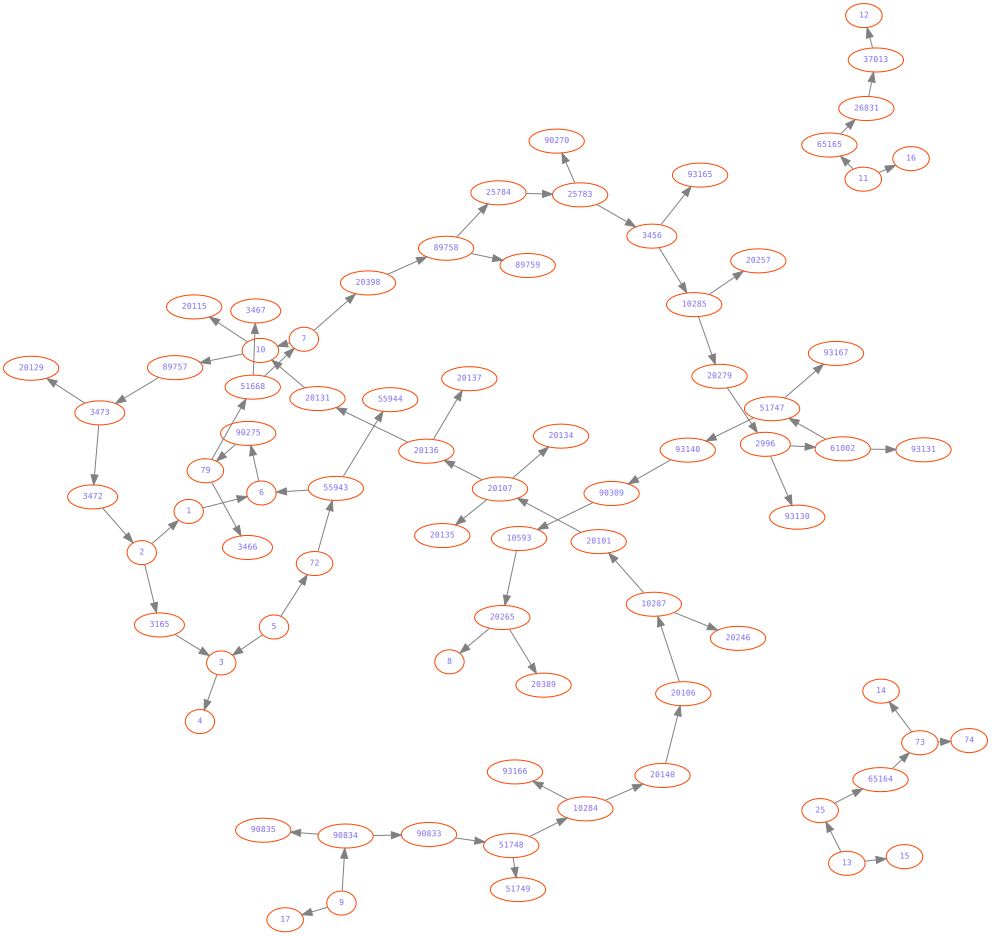

In [8]:
adjlShow(origins_targets_limited, directed=True, layout="fdp")

In [2]:
from library.lima_node_api import DB_API, getWeightByHour

In [8]:
def buildGraph(graph, func, limit=None):
  text = ''
  i = 1
  for key in graph.keys():
    if limit:
      if i > limit:
        break

    text += f'{key}:'

    for value in graph[key]:
      text += f'{value}' + (', ' if value != graph[key][-1] else '')

    text += '\n'
    i+=1
  
  func(text)

In [11]:
dbApi = DB_API()

flags = DB_API.SOURCE_ID + DB_API.TARGET_ID + DB_API.COST
sources_targets = dict()

rows = dbApi.getIntersections(flags)
for row in rows:
    if row[0] not in sources_targets:
        sources_targets[row[0]] = []
    sources_targets[row[0]].append((row[1], row[2]))

dbApi.endDbConnection()

buildGraph(sources_targets, print, 5)

source,target,cost


In [19]:
import heapq as hq
import math

def dijkstra(G, s):
  keys = [*G.keys()]
  n = len(G)
  visited = [False]*n
  path = [-1]*n
  cost = [math.inf]*n

  cost[keys.index(s)] = 0
  pqueue = [(0, s)]
  while pqueue:
    g, u = hq.heappop(pqueue)
    if not visited[u]:
      visited[keys.index(u)] = True
      for v, w in G[keys[u]]:
        if not visited[keys.index(v)]:
          f = g + w
          if f < cost[keys.index(v)]:
            cost[keys.index(v)] = f
            path[keys.index(v)] = keys[u]
            hq.heappush(pqueue, (f, keys.index(v)))

  return path, cost

In [24]:
dijkstra(sources_targets, 1)

AssertionError: breakpoint